# 4.2 损失函数

## 4.2.1 均方误差 $$E=\frac{1}{2}\sum_{k}\left(y_{k}-t_{k}\right)^{2}$$
  =

In [90]:
import numpy as np
import matplotlib.pyplot as plt

In [91]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [92]:
t =np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]) 


In [93]:
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])
mean_squared_error(y, t)

np.float64(0.09750000000000003)

In [94]:
y = np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])
mean_squared_error(y, t)

np.float64(0.5975)

## 4.2.2 交叉熵误差$$E=-\sum_kt_k\log y_k$$

In [95]:
x = np.arange(0.01, 1, 0.01)
y = np.log(x)
y

array([-4.60517019, -3.91202301, -3.5065579 , -3.21887582, -2.99573227,
       -2.81341072, -2.65926004, -2.52572864, -2.40794561, -2.30258509,
       -2.20727491, -2.12026354, -2.04022083, -1.96611286, -1.89711998,
       -1.83258146, -1.77195684, -1.71479843, -1.66073121, -1.60943791,
       -1.56064775, -1.51412773, -1.46967597, -1.42711636, -1.38629436,
       -1.34707365, -1.30933332, -1.27296568, -1.23787436, -1.2039728 ,
       -1.17118298, -1.13943428, -1.10866262, -1.07880966, -1.04982212,
       -1.02165125, -0.99425227, -0.96758403, -0.94160854, -0.91629073,
       -0.89159812, -0.86750057, -0.84397007, -0.82098055, -0.7985077 ,
       -0.77652879, -0.75502258, -0.73396918, -0.71334989, -0.69314718,
       -0.67334455, -0.65392647, -0.63487827, -0.61618614, -0.597837  ,
       -0.5798185 , -0.56211892, -0.54472718, -0.52763274, -0.51082562,
       -0.49429632, -0.4780358 , -0.46203546, -0.4462871 , -0.43078292,
       -0.41551544, -0.40047757, -0.38566248, -0.37106368, -0.35

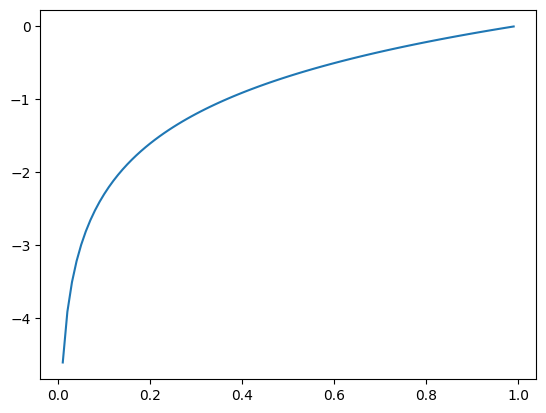

In [96]:
plt.plot(x, y)

In [97]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [98]:
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])
cross_entropy_error(y, t)

np.float64(0.510825457099338)

In [99]:
y = np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])
cross_entropy_error(y, t)

np.float64(2.302584092994546)

## 4.2.3 mini-bath学习

In [100]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F

# 定义数据转换
transform = transforms.Compose([
    transforms.ToTensor(),  # 将图像转换为张量，并归一化到 [0, 1] 范围内
    transforms.Normalize((0.5,), (0.5,))  # 进一步归一化到 [-1, 1] 范围内
])

# 下载并加载 MNIST 训练集
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
print(trainset)
trainloader = DataLoader(trainset, batch_size=60000, shuffle=True)

# 下载并加载 MNIST 测试集
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=10000, shuffle=False)

# 查看训练集和测试集的大小
print("Number of training images:", len(trainset))
print("Number of test images:", len(testset))

# 获取整个训练集的数据
train_iter = iter(trainloader)
x_train, t_train = next(train_iter)

# 获取整个测试集的数据
test_iter = iter(testloader)
x_test, t_test = next(test_iter)

# 将训练集和测试集的标签转换为 one-hot 编码
num_classes = 10
t_train_one_hot = F.one_hot(t_train, num_classes)
t_test_one_hot = F.one_hot(t_test, num_classes)

# 打印数据的形状
print("x_train shape:", x_train.shape)  # (60000, 1, 28, 28)
print("t_train shape:", t_train_one_hot.shape)  # (60000, 10)
print("x_test shape:", x_test.shape)  # (10000, 1, 28, 28)
print("t_test shape:", t_test_one_hot.shape)  # (10000, 10)

# 如果需要将图像展平成 (60000, 784) 的形状
x_train_flat = x_train.view(x_train.size(0), -1)
x_test_flat = x_test.view(x_test.size(0), -1)

print("x_train_flat shape:", x_train_flat.shape)  # (60000, 784)
print("x_test_flat shape:", x_test_flat.shape)  # (10000, 784)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )
Number of training images: 60000
Number of test images: 10000
x_train shape: torch.Size([60000, 1, 28, 28])
t_train shape: torch.Size([60000, 10])
x_test shape: torch.Size([10000, 1, 28, 28])
t_test shape: torch.Size([10000, 10])
x_train_flat shape: torch.Size([60000, 784])
x_test_flat shape: torch.Size([10000, 784])


In [101]:
a = np.arange(3)
y = np.array([[0.1, 0.2, 0.7],[0.3, 0.4, 0.3],[0.1, 0.5, 0.4]])
t = np.array([[1,2,0]])
t[0,0]

np.int64(1)

In [102]:
a 

array([0, 1, 2])

In [103]:
y[a, t]

array([[0.2, 0.3, 0.1]])

In [104]:
import numpy as np

# 真实标签 (整数标签)
t = np.array([2, 1, 0])  # 第一个样本的真实标签是 2，第二个样本的真实标签是 1，第三个样本的真实标签是 0

# 预测值 (概率分布)
y = np.array([
    [0.1, 0.2, 0.7],  # 第一个样本的预测值
    [0.3, 0.6, 0.1],  # 第二个样本的预测值
    [0.8, 0.1, 0.1]   # 第三个样本的预测值
])

# 批次大小
batch_size = y.shape[0]

# 使用高级索引提取对应真实标签的预测概率
predicted_probabilities = y[np.arange(batch_size), t]

print("Predicted probabilities:", predicted_probabilities)

Predicted probabilities: [0.7 0.6 0.8]


In [105]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

y = x + 2
print(y)

z = y * y * 3
print(z)
out = z.mean()
print(out)

# 反向传播
out.backward()
print(x.grad)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)
tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)
tensor(27., grad_fn=<MeanBackward0>)
tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [106]:
x = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]], requires_grad=True)
y = x**2

In [ ]:
y.sum().backward()
x.grad



tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.]])

# 4.3 数值微分

## 4.3.2 数值微分的例子$$ y = 0.01x^2 +0.1x $$

In [1]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

In [2]:
import numpy as np
import matplotlib.pyplot as plt

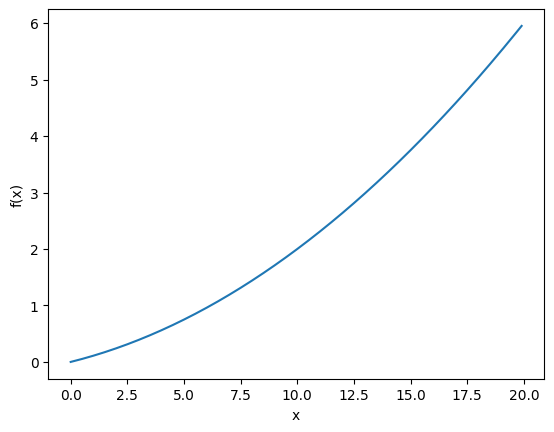

In [3]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In [4]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [5]:
numerical_diff(function_1, 5)

0.1999999999990898

In [6]:
numerical_diff(function_1, 10)

0.2999999999986347

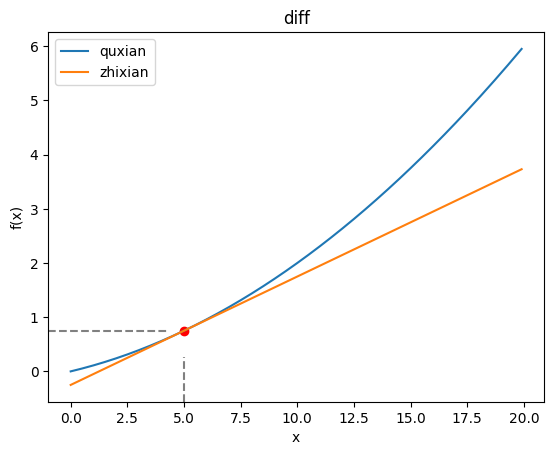

In [30]:
x = np.arange(0.0, 20.0, 0.1)
y1 = numerical_diff(function_1, 5) * x - 0.25
y = function_1(x)
plt.plot(x, y, label = 'quxian')
plt.plot(x, y1, label = 'zhixian')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.axvline(x=5, ymax=0.75/plt.ylim()[1], color='gray', linestyle='--')
plt.axhline(y=0.75, xmax=5/plt.xlim()[1], color='gray', linestyle='--')

plt.scatter([5], [0.75], color='red')
plt.title('diff')
plt.legend()
plt.show()

## 4.3.3 偏导数

(100, 100)


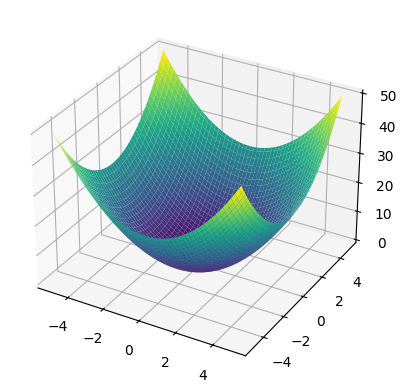

In [52]:
def function_2(x):
    return np.sum(x**2, axis=0)


x0 = np.linspace(-5, 5, 100)
x1 = np.linspace(-5, 5, 100)
# print(f'x0: {x0}')
# print(f'x0: {x1}')
x0, x1 = np.meshgrid(x0, x1)
z = function_2(np.array([x0, x1]))
print(z.shape)

# 创建图形
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制三维曲面图
ax.plot_surface(x0, x1, z, cmap='viridis')


In [54]:
import numpy as np

# 定义函数
def function_2(x):
    return np.sum(x**2, axis=1)

# 创建一个三维数组
# 假设我们有两个二维矩阵，每个矩阵的形状为 (3, 3)
x0 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
x1 = np.array([[9, 8, 7], [6, 5, 4], [3, 2, 1]])

# 将两个二维矩阵组合成一个三维数组
a = np.array([x0, x1])

# 打印三维数组
print("Three-dimensional array a:")
print(a)

# 使用 function_2 计算每个位置的平方和
z = function_2(a)

# 打印结果
print("Result of function_2(a):")
print(z)


Three-dimensional array a:
[[[1 2 3]
  [4 5 6]
  [7 8 9]]

 [[9 8 7]
  [6 5 4]
  [3 2 1]]]
Result of function_2(a):
[[ 66  93 126]
 [126  93  66]]


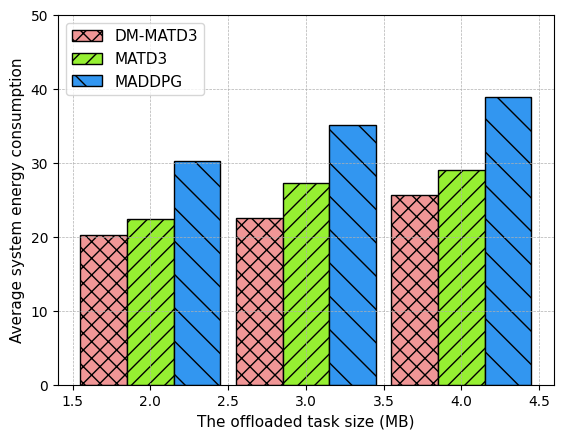

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import hatch

# 数据定义
data = np.array([[20.2, 22.4, 30.2],
                 [22.5, 27.3, 35.2],
                 [25.7, 29.1, 38.9]])

X = np.array([2, 3, 4])  # X轴的位置
bar_width = 0.3  # 柱子的宽度
colors = [(240/255, 150/255, 150/255), 
          (150/255, 240/255, 50/255), 
          (50/255, 150/255, 240/255)]
hatches = ['xx', '//', '\\']  # 纹理填充模式

fig, ax = plt.subplots()
bars = []

for i in range(data.shape[1]):
    bar = ax.bar(X + i * bar_width - bar_width, data[:, i], width=bar_width, 
                 color=colors[i], edgecolor='k', hatch=hatches[i], linewidth=1)
    bars.append(bar)

# 绘制图例
legend_labels = ['DM-MATD3', 'MATD3', 'MADDPG']
legend_patches = [mpatches.Patch(facecolor=colors[i], edgecolor='k', hatch=hatches[i], label=legend_labels[i])
                   for i in range(len(legend_labels))]
ax.legend(handles=legend_patches, loc='upper left', fontsize=11)

# 设置坐标轴标签
ax.set_xlabel('The offloaded task size (MB)', fontsize=11)
ax.set_ylabel('Average system energy consumption', fontsize=11)
ax.set_ylim(0, 50)
ax.grid(True, linestyle='--', linewidth=0.5)

# 显示图形
plt.show()